#### 1. Загрузите файл HR.csv в pandas dataframe

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway, shapiro

In [3]:
df = pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


#### 2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
#по категориальным данным
mode = df['department'].mode()[0]
count = df['department'].value_counts()
unique = df['department'].unique()
print('мода:', mode, '\n', '\n', count, '\n', '\n', 'уникальные значения:', unique)

#больше всего данных о продажниках

мода: sales 
 
 department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64 
 
 уникальные значения: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


In [6]:
mode = df['salary'].mode()[0]
count = df['salary'].value_counts()
unique = df['salary'].unique()
print('мода:', mode, '\n', '\n', count, '\n', '\n', 'уникальные значения:', unique)
#больше всего низких и средних зарплат

мода: low 
 
 salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64 
 
 уникальные значения: ['low' 'medium' 'high']


#### 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [7]:
for_heatmap = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
                 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']]

In [8]:
for_heatmap.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<Axes: >

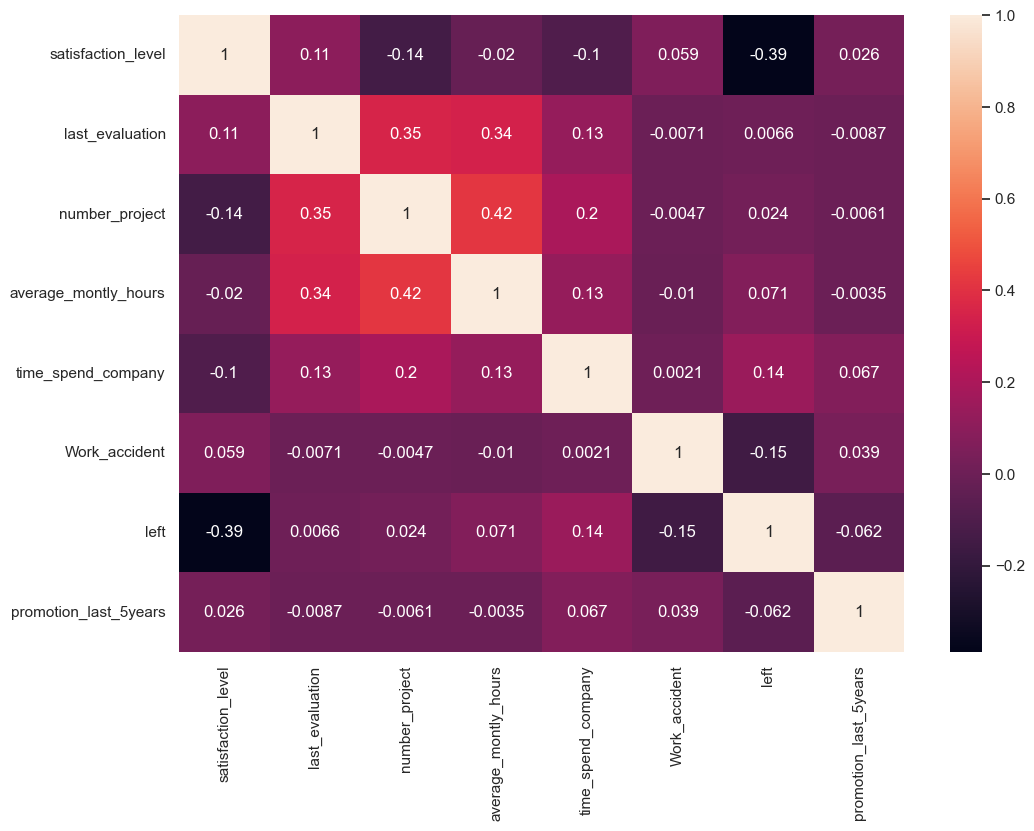

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(for_heatmap.corr(), annot=True)

Самые скоррелированные переменные: 

1. Количество выполненных проектов и среднее количество часов на рабочем месте в месяц
2. Удовлетворенность работой и увольнение (чем меньше удовлетворенность, тем больше уход с работы, отрицательная корреляция)

Самые не скорелированные переменные: 
1. Повышение за последние пять лет и количество часов, проведенных на рабочем месте за месяц
2. Стаж работы в компании и происходил ли несчастный случай с этим сотрудником

#### 4. Рассчитайте сколько сотрудников работает в каждом департаменте

In [10]:
count = df['department'].value_counts()
count

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

#### 5. Показать распределение сотрудников по зарплатам.

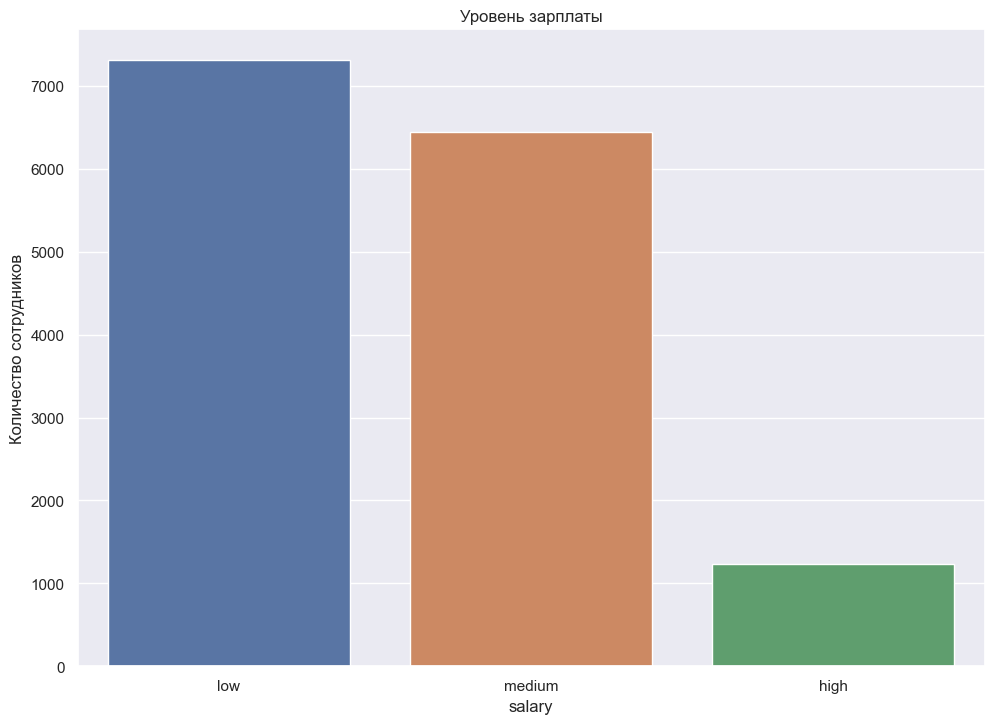

In [11]:
sns.countplot(data=df, x='salary')
plt.title('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.show()

#### 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [ ]:
#снизу департаменты, слева количество человек, на диаграмме уровень зарплат

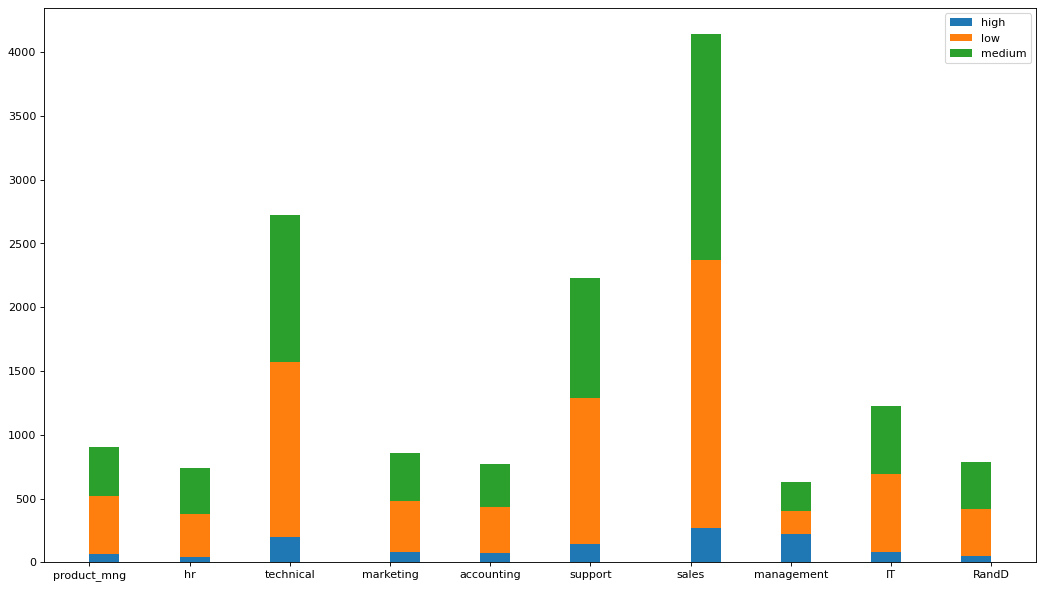

In [12]:
# Prepare data
x_var = 'department'
groupby_var = 'salary'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False)

plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})

#### 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [16]:
from scipy.stats import shapiro

In [13]:
#функция для проверки нормальности
def check_normality(data):

    result = shapiro(data)
    
   
    if result[1] < 0.05:
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

In [17]:
check_normality(df['average_montly_hours'])

Отклоняем нулевую гипотезу >> Данные распределены не нормально


D:\progr\Anaconda\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [74]:
df_time = df[['salary', 'average_montly_hours']]
df_time

,salary,average_montly_hours
0,low,157
1,medium,262
2,medium,272
3,low,223
4,low,159
...,...,...
14994,low,151
14995,low,160
14996,low,143
14997,low,280


In [79]:
df_low = df_time.loc[df_time['salary'] == 'low']
df_high = df_time.loc[df_time['salary'] == 'high']

In [93]:
df_low

,salary,average_montly_hours
0,low,157
3,low,223
4,low,159
5,low,153
6,low,247
...,...,...
14994,low,151
14995,low,160
14996,low,143
14997,low,280


In [94]:
df_high

,salary,average_montly_hours
72,high,149
111,high,289
189,high,156
267,high,129
306,high,149
...,...,...
14829,high,148
14868,high,130
14902,high,159
14941,high,131


In [87]:
min_ = min(df_low['average_montly_hours'])
max_ = max(df_low['average_montly_hours'])
range_ = max_ - min_
disp = int(df_low['average_montly_hours'].var())
mean = df_low['average_montly_hours'].mean()
median = df_low['average_montly_hours'].median()
mode = int(df_low['average_montly_hours'].mode()[0])
print('Low','\n', 'мин:', min_,'\n', 'макс:', max_, '\n', 'размах:', range_, '\n', 'дисперсия:', disp, 
      '\n', 'среднее:', mean,'\n', 'медиана:',median,'\n', 'мода:', mode)

Low 
 мин: 96 
 макс: 310 
 размах: 214 
 дисперсия: 2583 
 среднее: 200.9965828321487 
 медиана: 199.0 
 мода: 135


In [88]:
min_ = min(df_high['average_montly_hours'])
max_ = max(df_high['average_montly_hours'])
range_ = max_ - min_
disp = int(df_high['average_montly_hours'].var())
mean = df_high['average_montly_hours'].mean()
median = df_high['average_montly_hours'].median()
mode = int(df_high['average_montly_hours'].mode()[0])
print('High','\n', 'мин:', min_,'\n', 'макс:', max_, '\n', 'размах:', range_, '\n', 'дисперсия:', disp, 
      '\n', 'среднее:', mean,'\n', 'медиана:',median,'\n', 'мода:', mode)

High 
 мин: 96 
 макс: 307 
 размах: 211 
 дисперсия: 2276 
 среднее: 199.86742118027485 
 медиана: 199.0 
 мода: 180


Судя по показателям, гипотеза не верна. Но проверим это с помощью теста Манна-Уитни.

In [100]:
stat, p = stats.mannwhitneyu(df_low['average_montly_hours'], df_high['average_montly_hours'])

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 4542795.50000, p = 0.82413
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


Распределения одинаковые, гипотеза, скорее всего, не верна. Посмотрим графически:

(array([ 5., 15., 11., 15., 10.,  4., 26., 40., 42., 41., 47., 40., 57.,
        39., 43., 53., 33., 30., 53., 25., 37., 48., 47., 28., 42., 41.,
        43., 33., 30., 51., 45., 41., 50., 37., 10.,  9., 13.,  0.,  1.,
         2.]),
 array([ 96.   , 101.275, 106.55 , 111.825, 117.1  , 122.375, 127.65 ,
        132.925, 138.2  , 143.475, 148.75 , 154.025, 159.3  , 164.575,
        169.85 , 175.125, 180.4  , 185.675, 190.95 , 196.225, 201.5  ,
        206.775, 212.05 , 217.325, 222.6  , 227.875, 233.15 , 238.425,
        243.7  , 248.975, 254.25 , 259.525, 264.8  , 270.075, 275.35 ,
        280.625, 285.9  , 291.175, 296.45 , 301.725, 307.   ]),
 <BarContainer object of 40 artists>)

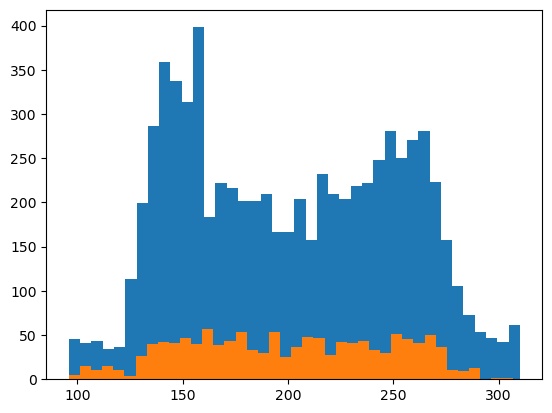

In [101]:
plt.hist(df_low['average_montly_hours'], bins=40, alpha=1)
plt.hist(df_high['average_montly_hours'], bins=40, alpha=1)

Видно, что сотрудников с низкой зарплатой гораздо больше, но графики потраченного времени на работу в месяц, в целом, очень похожи.

#### 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников:
1) Доля сотрудников с повышением за последний пять лет
2) Средняя степень удовлетворенности
3) Среднее количество проектов

In [118]:
#1
df['promotion_last_5years'].count()

14999

In [148]:
df_prom = (df.loc[df['promotion_last_5years'] == 1])
df_prom['promotion_last_5years'].count()

319

In [149]:
res = df_prom['promotion_last_5years'].count() / df['promotion_last_5years'].count()
print(f'Доля: {round(res*100, 2)}%')

Доля: 2.13%


In [111]:
#2
df_0 = (df.loc[df['left'] == 0])
print('Средняя удовлетворённость не уволившихся:')
df_0['satisfaction_level'].mean()

Средняя удовлетворённость не уволившихся:


0.666809590479524

In [112]:
df_0 = (df.loc[df['left'] == 1])
print('Средняя удовлетворённость уволившихся:')
df_0['satisfaction_level'].mean()
#всё логично, недовольные увольняются

Средняя удовлетворённость уволившихся:


0.4400980117614114

In [114]:
#3
df_0 = (df.loc[df['left'] == 0])
print('Среднее количество проектов у не уволившихся:')
df_0['number_project'].mean()

Среднее количество проектов у не уволившихся:


3.786664333216661

In [115]:
df_0 = (df.loc[df['left'] == 1])
print('Среднее количество проектов у уволившихся:')
df_0['number_project'].mean()
#практически одинаковое колчество, у уволившихся немного больше

Среднее количество проектов у уволившихся:


3.8555026603192384

#### 9. Разделить данные на тестовую и обучающую выборки. 
#### Построить модель LDA, предсказывающую, уволился ли сотрудник на основе имеющихся факторов (кроме departure и salary). 
#### Оценить качество модели на тестовой выборке.

In [180]:
df_lda = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
                 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']]
df_lda

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [181]:
data_class = df_lda[['left']]

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_lda, data_class, test_size=0.25, random_state=42)

In [183]:
len(X_test)

3750

In [184]:
len(X_train)

11249

In [185]:
y_train=y_train.astype('int')

In [186]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [187]:
lda.fit(X_train, y_train)

C:\Users\Алехандро\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [188]:
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [189]:
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [190]:
y_test_1 = []
for i in y_test.to_numpy():
    for n in i:
        y_test_1.append(n)

y_test = np.asarray(y_test_1)
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [191]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
3745,0,0
3746,1,0
3747,0,0
3748,0,1


In [193]:
from sklearn.metrics import accuracy_score
print('Точность модели:')
accuracy_score(y_test, lda.predict(X_test))

Точность модели:


0.7536